# Entry G19b notebook: Neighborhood Node Counts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('once')

from neo4j import GraphDatabase

In [2]:
uri = "bolt://localhost:7687"

driver = GraphDatabase.driver(uri, auth=('neo4j', 'password'))

uni_session = driver.session(database="unimodal")
bi_session = driver.session(database="bimodal")
mix_session = driver.session(database="mixmodal")

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Neighbor Counts and Villain Percent

In [44]:
def nearest_villains(con, model_type='uni'):
    if model_type == 'uni' or model_type == 'mix':
        max_level = 2
        rel_type = 'KNOWS'
    else:
        max_level = 4
        rel_type = 'APPEARS_IN'
        
    v_query = '''MATCH (h:Hero)
    call apoc.path.spanningTree(h, {minLevel: 1, maxLevel:'''  + f"{max_level}, labelFilter:'>Villain', relationshipFilter:'{rel_type}'" + '''})
    YIELD path
    RETURN h.name as name, labels(h)[-1] as type, length(path) as distance, count(path) as villain_ct'''
    
    h_query = '''MATCH (h:Hero)
    call apoc.path.spanningTree(h, {minLevel: 1, maxLevel:'''  + f"{max_level}, labelFilter:'>Hero', relationshipFilter:'{rel_type}'" + '''})
    YIELD path
    RETURN h.name as name, labels(h)[-1] as type, length(path) as distance, count(path) as total_ct'''
    
    df = pd.DataFrame(con.run(v_query).data()).merge(
    pd.DataFrame(con.run(h_query).data()),
    on = ['name', 'type', 'distance'], how='outer').fillna(0)
    df['villain_pct'] = df['villain_ct'] / df['total_ct']
    return df

In [45]:
uni_neighbors = nearest_villains(uni_session)
uni_neighbors

,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,2,3.0,30,0.100000
1,3-D MAN/CHARLES CHAN,Hero,1,11.0,122,0.090164
2,3-D MAN/CHARLES CHAN,Hero,2,814.0,5411,0.150434
3,4-D MAN/MERCURIO,Villain,1,11.0,72,0.152778
4,4-D MAN/MERCURIO,Villain,2,635.0,3749,0.169379
...,...,...,...,...,...,...
12822,ZEAKLAR,Hero,1,0.0,2,0.000000
12823,"ZEITGEIST, NICOLA",Hero,1,0.0,11,0.000000
12824,"ZELIG, LON",Hero,1,0.0,11,0.000000
12825,ZET,Hero,1,0.0,5,0.000000


In [46]:
bi_neighbors = nearest_villains(bi_session, 'bi')
bi_neighbors

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,4,3.0,30,0.100000
1,3-D MAN/CHARLES CHAN,Hero,2,11.0,122,0.090164
2,3-D MAN/CHARLES CHAN,Hero,4,814.0,5411,0.150434
3,4-D MAN/MERCURIO,Villain,2,11.0,72,0.152778
4,4-D MAN/MERCURIO,Villain,4,635.0,3749,0.169379
...,...,...,...,...,...,...
12822,ZEAKLAR,Hero,2,0.0,2,0.000000
12823,"ZEITGEIST, NICOLA",Hero,2,0.0,11,0.000000
12824,"ZELIG, LON",Hero,2,0.0,11,0.000000
12825,ZET,Hero,2,0.0,5,0.000000


In [47]:
u_mix_neighbors = nearest_villains(mix_session)
u_mix_neighbors

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,2,3.0,30,0.100000
1,3-D MAN/CHARLES CHAN,Hero,1,11.0,122,0.090164
2,3-D MAN/CHARLES CHAN,Hero,2,814.0,5411,0.150434
3,4-D MAN/MERCURIO,Villain,1,11.0,72,0.152778
4,4-D MAN/MERCURIO,Villain,2,635.0,3749,0.169379
...,...,...,...,...,...,...
12822,ZEAKLAR,Hero,1,0.0,2,0.000000
12823,"ZEITGEIST, NICOLA",Hero,1,0.0,11,0.000000
12824,"ZELIG, LON",Hero,1,0.0,11,0.000000
12825,ZET,Hero,1,0.0,5,0.000000


In [48]:
b_mix_neighbors = nearest_villains(mix_session,'bi')
b_mix_neighbors

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,type,distance,villain_ct,total_ct,villain_pct
0,24-HOUR MAN/EMMANUEL,Hero,4,3.0,30,0.100000
1,3-D MAN/CHARLES CHAN,Hero,2,11.0,122,0.090164
2,3-D MAN/CHARLES CHAN,Hero,4,814.0,5411,0.150434
3,4-D MAN/MERCURIO,Villain,2,11.0,72,0.152778
4,4-D MAN/MERCURIO,Villain,4,635.0,3749,0.169379
...,...,...,...,...,...,...
12822,ZEAKLAR,Hero,2,0.0,2,0.000000
12823,"ZEITGEIST, NICOLA",Hero,2,0.0,11,0.000000
12824,"ZELIG, LON",Hero,2,0.0,11,0.000000
12825,ZET,Hero,2,0.0,5,0.000000


In [50]:
def stacked_hist_w_log1(distance, df_lst = [uni_neighbors, u_mix_neighbors, bi_neighbors, b_mix_neighbors], plot_title = None, col_names=['total_ct', 'villain_ct', 'villain_pct']):
    col_plots = 2
    row_plots = len(df_lst) * len(col_names)
    x_size = col_plots *6
    y_size = row_plots *4
    row_nbr = 0
    df_names = ['Unimodal', 'Uni-Mixed', 'Bimodal', 'Bi-Mixed']
    fig, axes = plt.subplots(row_plots, col_plots, figsize=(x_size,y_size))
    fig.suptitle(plot_title)
    for col_name in col_names:
        for df_nbr, df in enumerate(df_lst):
            dist = df.sort_values('distance')['distance'].unique()[distance-1]
            for col in range(col_plots):
                dframe = df.loc[df['distance'] == dist, ['name', 'type', col_name]]
                sns.histplot(dframe, ax = axes[row_nbr, col], x=col_name, hue='type', stat='count', multiple='stack')
                if col == 0:
                    axes[row_nbr, col].set_title(df_names[df_nbr] + ' ' + col_name)
                else:
                    axes[row_nbr, col].set_yscale('log')
                    axes[row_nbr, col].set_title(df_names[df_nbr] + ' ' + col_name + ' log')
            row_nbr += 1
    plt.tight_layout()
    plt.show()

## Nearest Neighbors

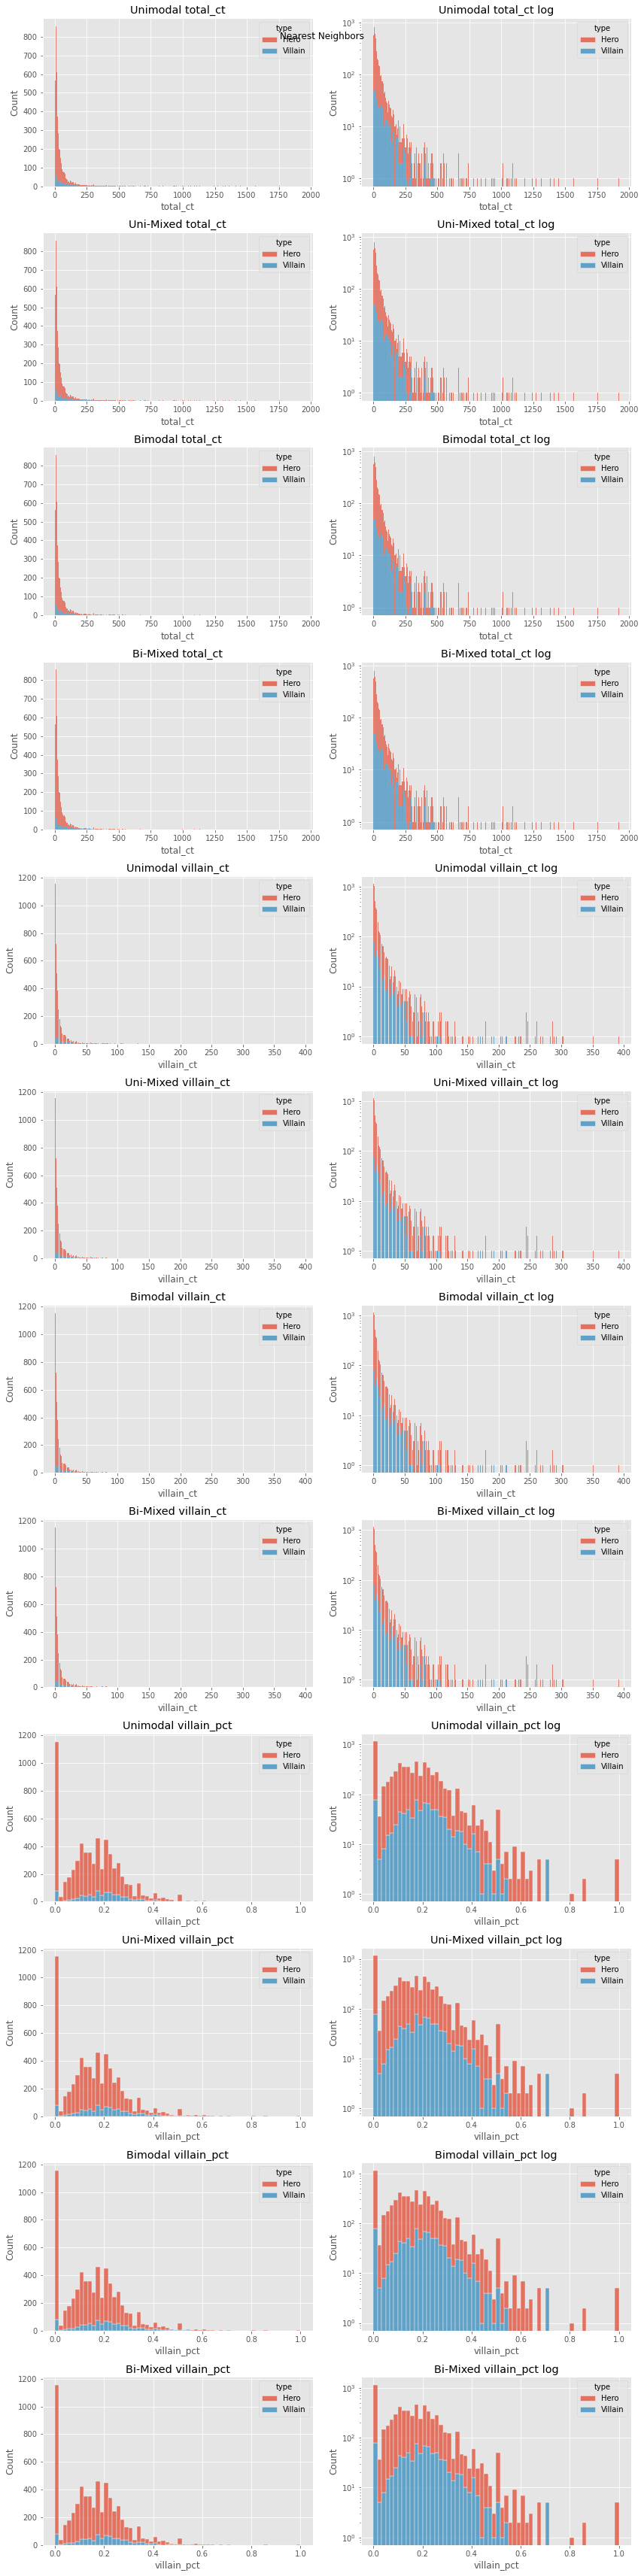

In [51]:
stacked_hist_w_log1(1, plot_title = "Nearest Neighbors")

## Next Nearest Neighbors

C:\Users\jfish\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


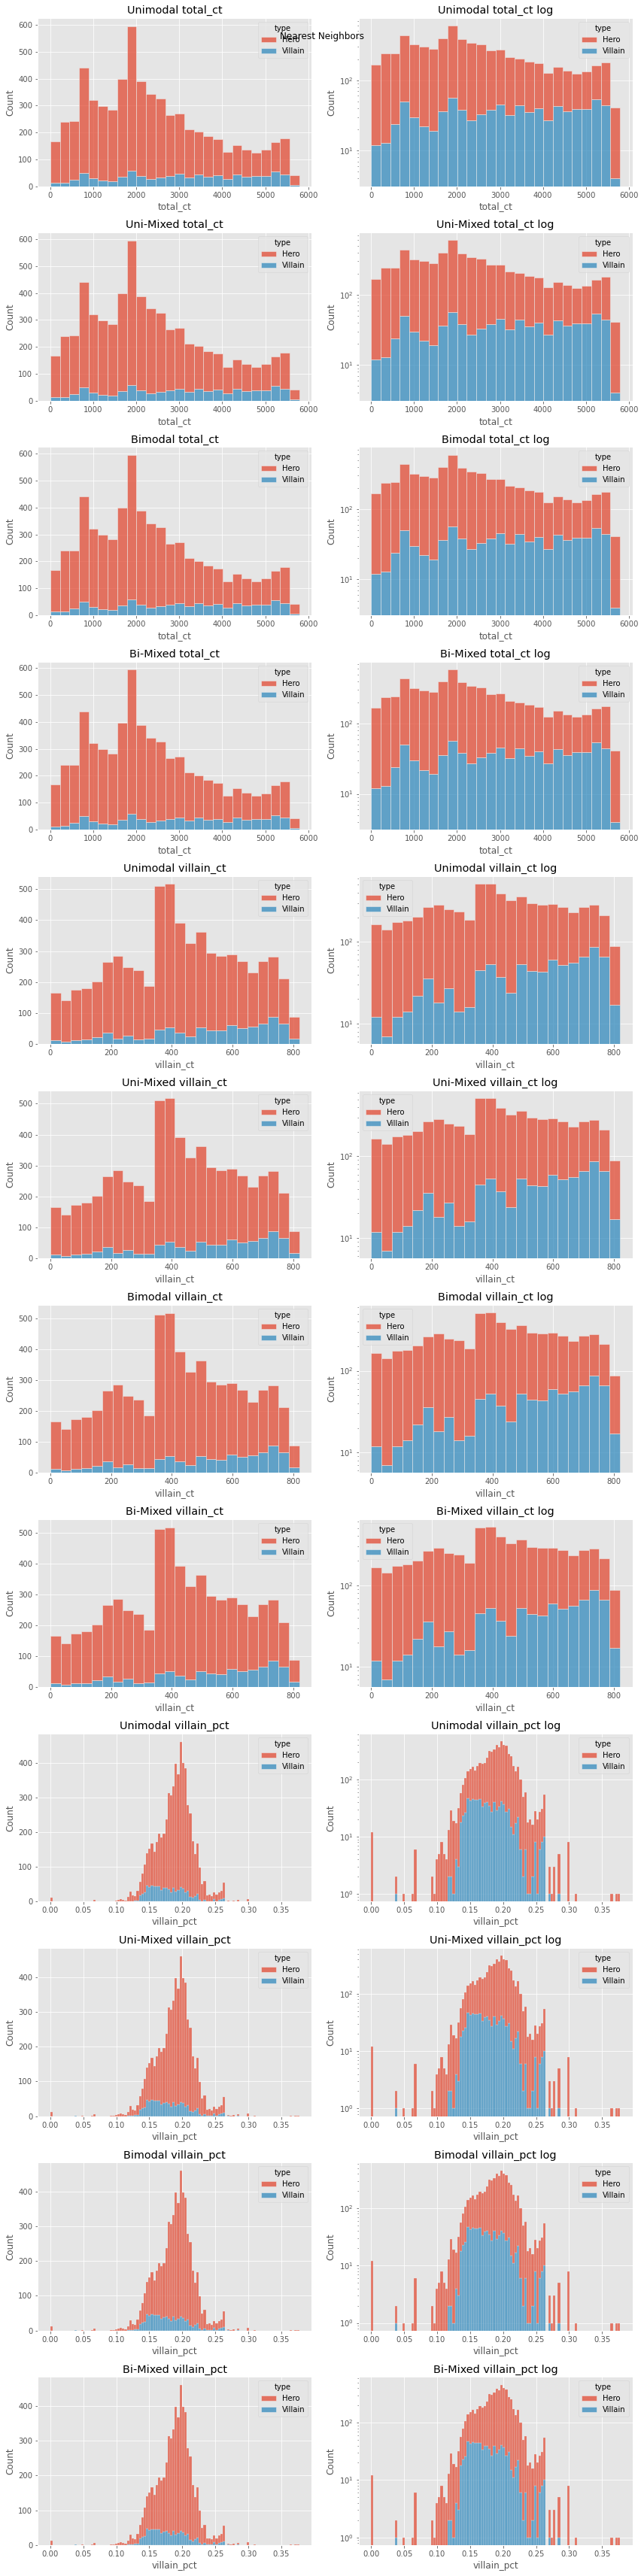

In [52]:
stacked_hist_w_log1(2, plot_title = "Nearest Neighbors")